# Student performance 


## About Dataset
##### We are going to look at the student performance on the basis of variables such as gender ,ethnicity,parental level of education,lunch and test preparation course.

## Importing Libraries 


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import scipy.stats

%matplotlib inline



##### Importing dataset of student as pandas dataframe


In [10]:
df=pd.read_csv('data/stud.csv')

##### showing top 10 records

In [12]:

df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


##### shape of dataset

In [14]:
df.shape

(1000, 8)

### Dataset Information
##### dataset properties by checking unique we are getting the following unique values associated with the categorical variables in the given dataset.
##### --gender : male and female
##### --race/ethinicty :group A,B,C,D,E
##### --parental level of education :(bachelor's degree,some college,master's degree,associate's degree,high school)
##### --lunch : having lunch before test (standard or free/reduced)
##### --test preparation course : complete or not complete before test


#### 3 Data cleaning tasks include checking missing values,duplicates,data type,number of unique columns . 

##### 3.1 checking missing values

In [16]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### The dataset has no null values 😌

##### 3.2 checking duplicates

In [21]:
df.duplicated().sum()
if df.duplicated().sum()==0:
    print("the duplicate value is :",df.duplicated().sum(),".","No duplicate values 😌")

the duplicate value is : 0 . No duplicate values 😌


##### check data types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### checking number of unique in each column

In [23]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Statistics regarding dataset

In [24]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
###### From above description of numerical data, all means are very close to each other - between 66 and 68.05;
###### All standard deviations are also close - between 14.6 and 15.19;
###### While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading is  higher = 17

##### 3.7 Exploring Data


In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [28]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('Dataset has {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nDataset has {} categorical features : {}'.format(len(categorical_features), categorical_features))

Dataset has 3 numerical features : ['math_score', 'reading_score', 'writing_score']

Dataset has 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### 3.8 Adding columns for "Total Score" and "Average"


In [29]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full = df[df['reading_score'] == 100]['total score'].count()
writing_full = df[df['writing_score'] == 100]['total score'].count()
math_full = df[df['math_score'] == 100]['gender'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [34]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
##### # From above values we get students have performed the worst in Maths
##### # Best performance is in reading section

### Exploring data through visualisation

##### Using histogram ,KDE (kernal distribution function),pie charts and some more visualisations to make some conclusion 
##### Will have to perform statistical test to confirm found insights

##### Histogram and KDE

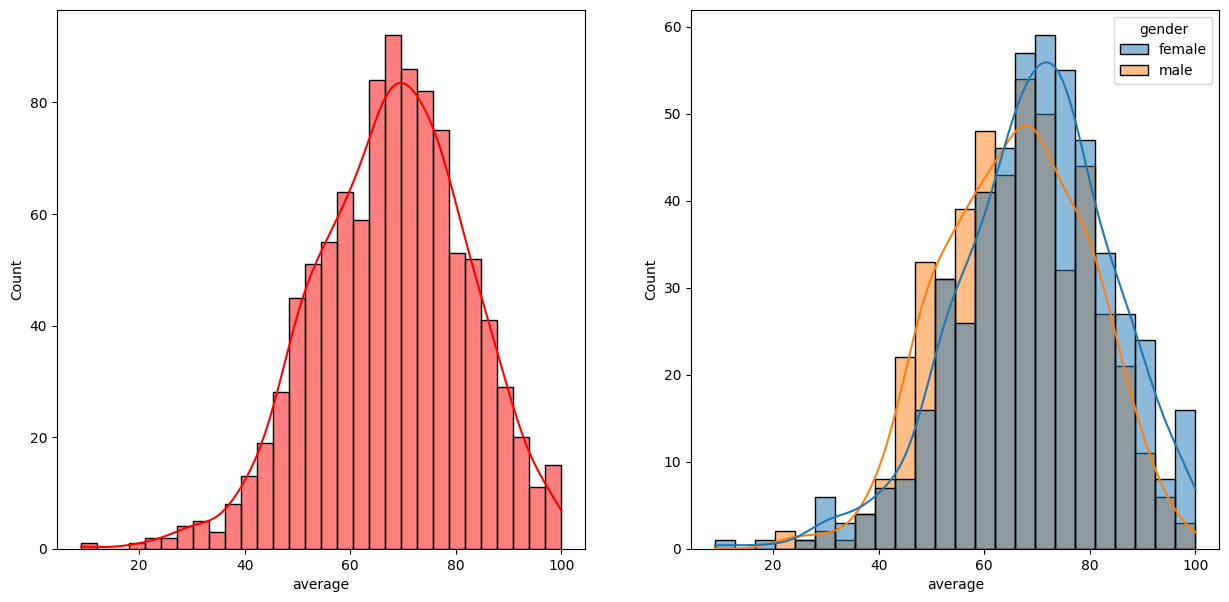

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

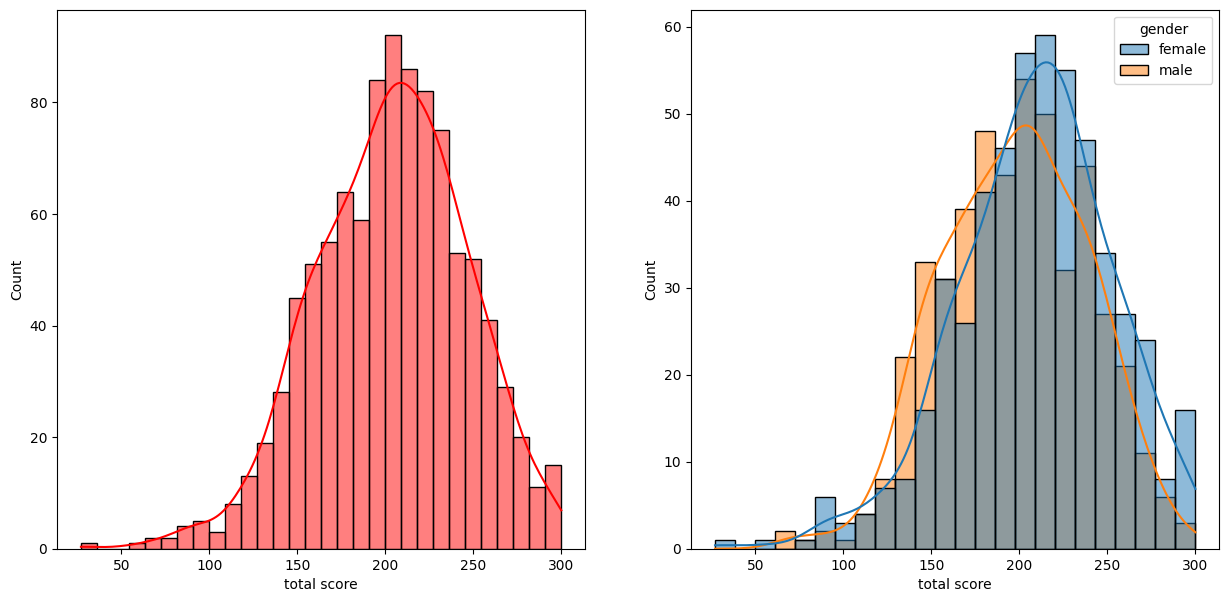

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#### From Graph it is clear that female students are performing better than male students

In [48]:
import scipy.stats as stats

# Assuming 'df' is your DataFrame with the student performance data
male_scores = df[df['gender'] == 'male']['total score']
female_scores = df[df['gender'] == 'female']['total score']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant difference in total scores between male and female students.")
else:
    print("There is no statistically significant difference in total scores between male and female students.")


t-statistic: -4.169913529142
p-value: 3.311973638243664e-05
There is a statistically significant difference in total scores between male and female students.


C:\Users\rutur\AppData\Local\Temp\ipykernel_10568\258102434.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rutur\AppData\Local\Temp\ipykernel_10568\258102434.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rutur\AppData\Local\Temp\ipykernel_10568\258102434.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


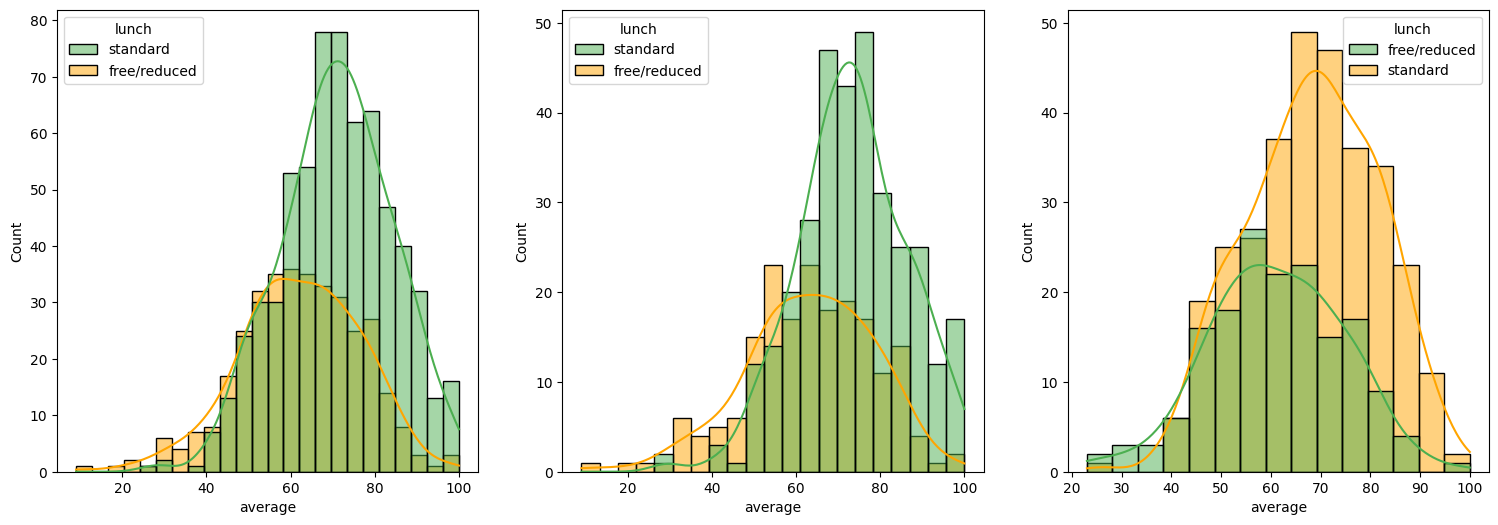

In [54]:
custom_palette = ["#4CAF50", "#FFA500"]

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch',palette=custom_palette)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch',palette=custom_palette)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',palette=custom_palette)
plt.show()

#### Insights
##### Standard lunch helps perform well in exams.
##### Standard lunch helps perform well in exams be it a male or a female

C:\Users\rutur\AppData\Local\Temp\ipykernel_10568\2577255396.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rutur\AppData\Local\Temp\ipykernel_10568\2577255396.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rutur\AppData\Local\Temp\ipykernel_10568\2577255396.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


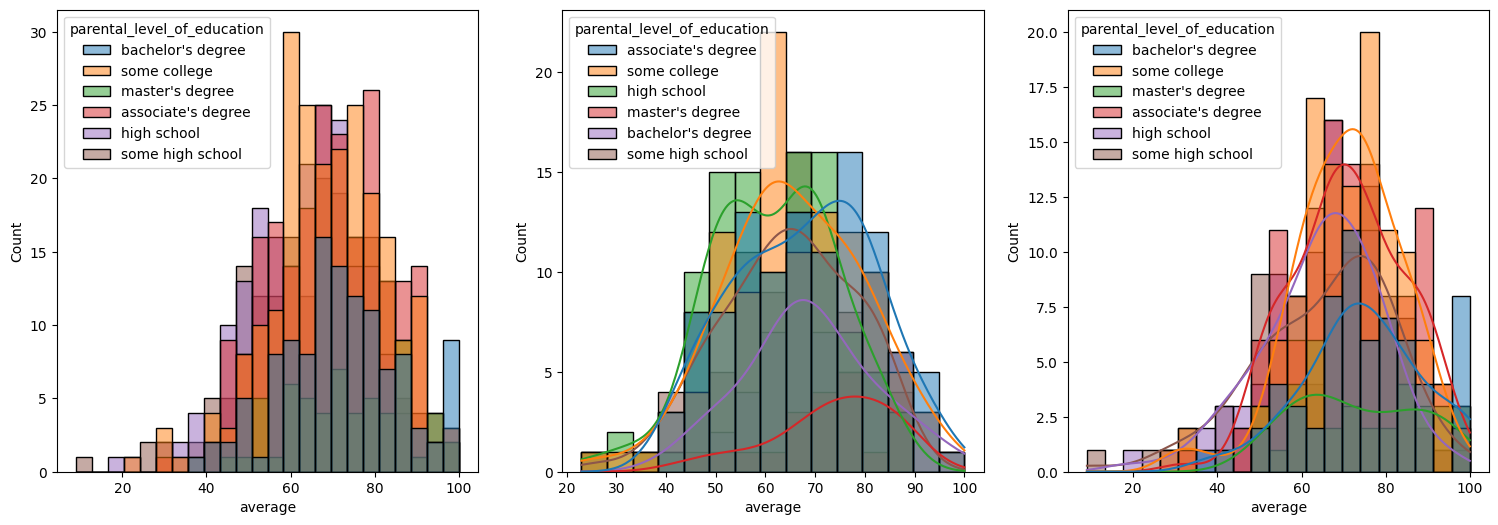

In [62]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

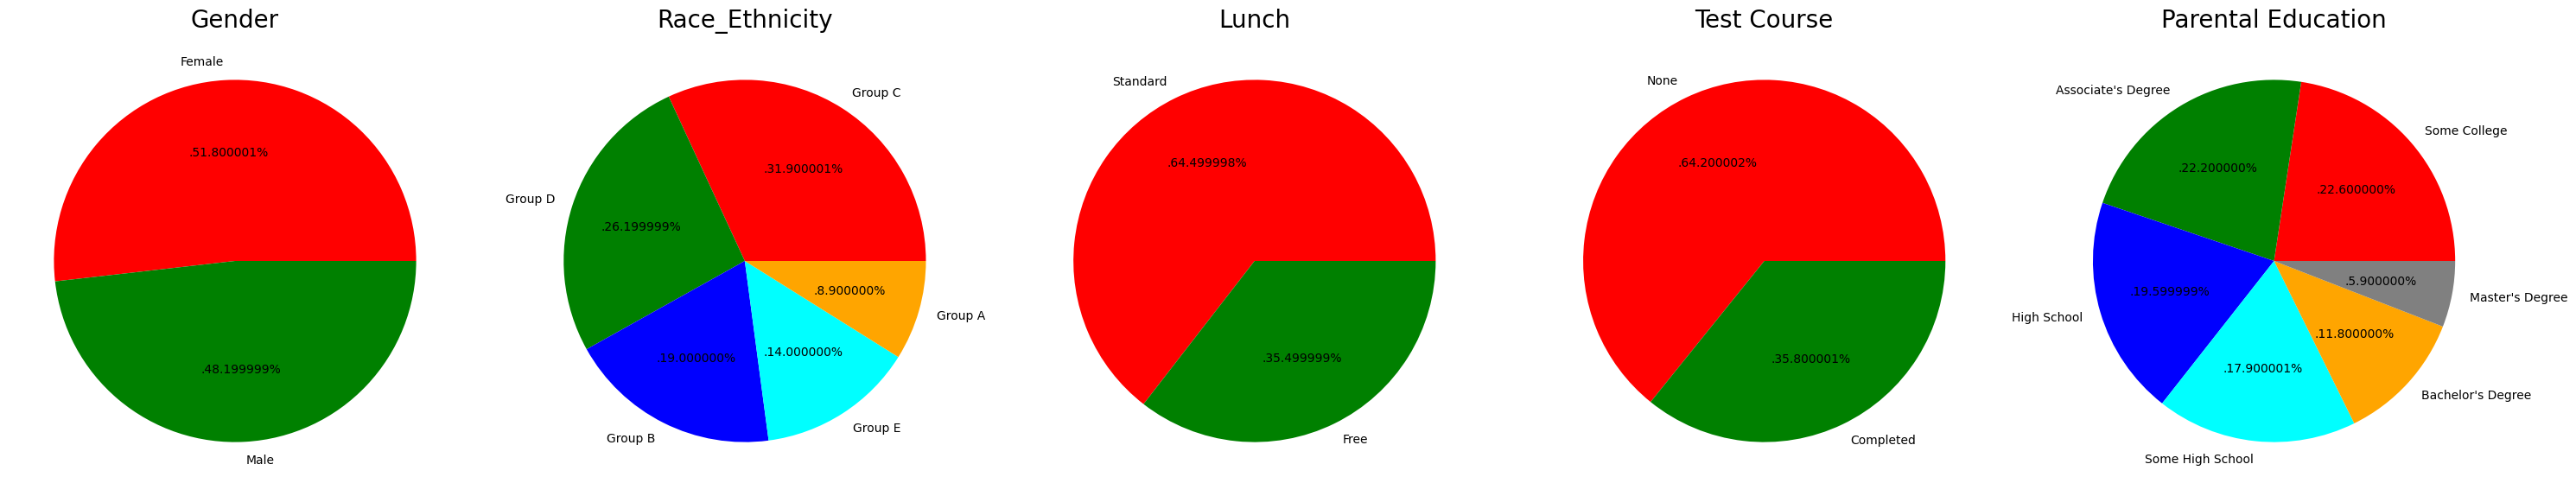

In [88]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()*10
labels = ['Female', 'Male']
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

##### Insights
###### Number of Male and Female students is almost equal
###### Number students are greatest in Group C
###### Number of students who have standard lunch are greater
###### Number of students who have not enrolled in any test preparation course is greater
###### Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### checking for outliers


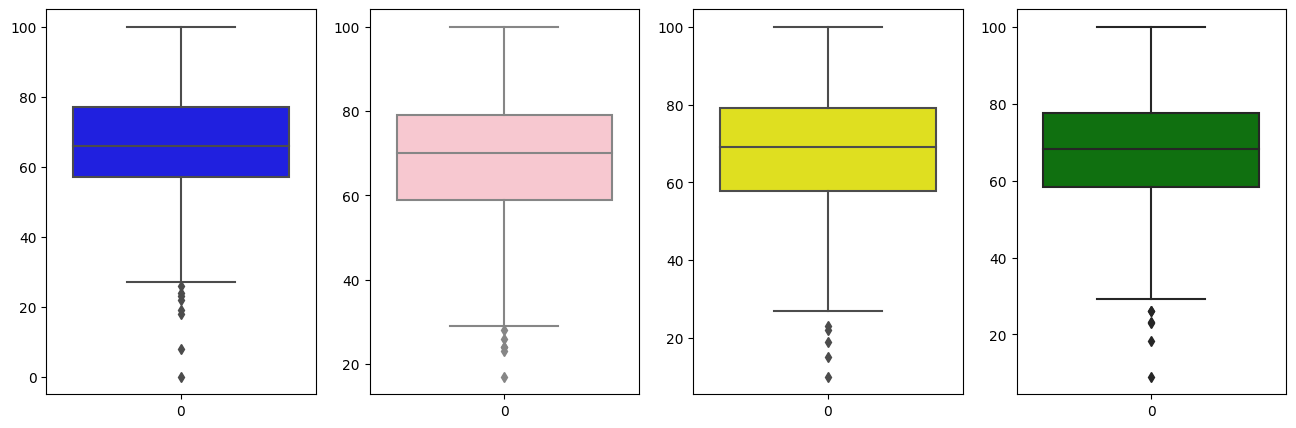

In [91]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='blue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='pink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='green')
plt.show()

#### Does test preparation have any effect on student performance

<Axes: xlabel='lunch', ylabel='writing_score'>

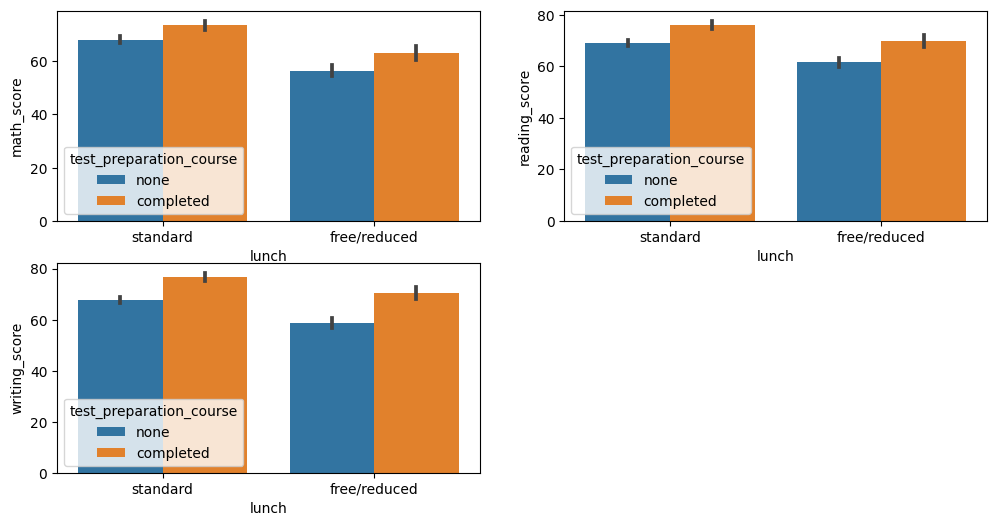

In [93]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#####  Insight :generally test preparation score have high score both for standard and free lunch

d:\projects\ml projects\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


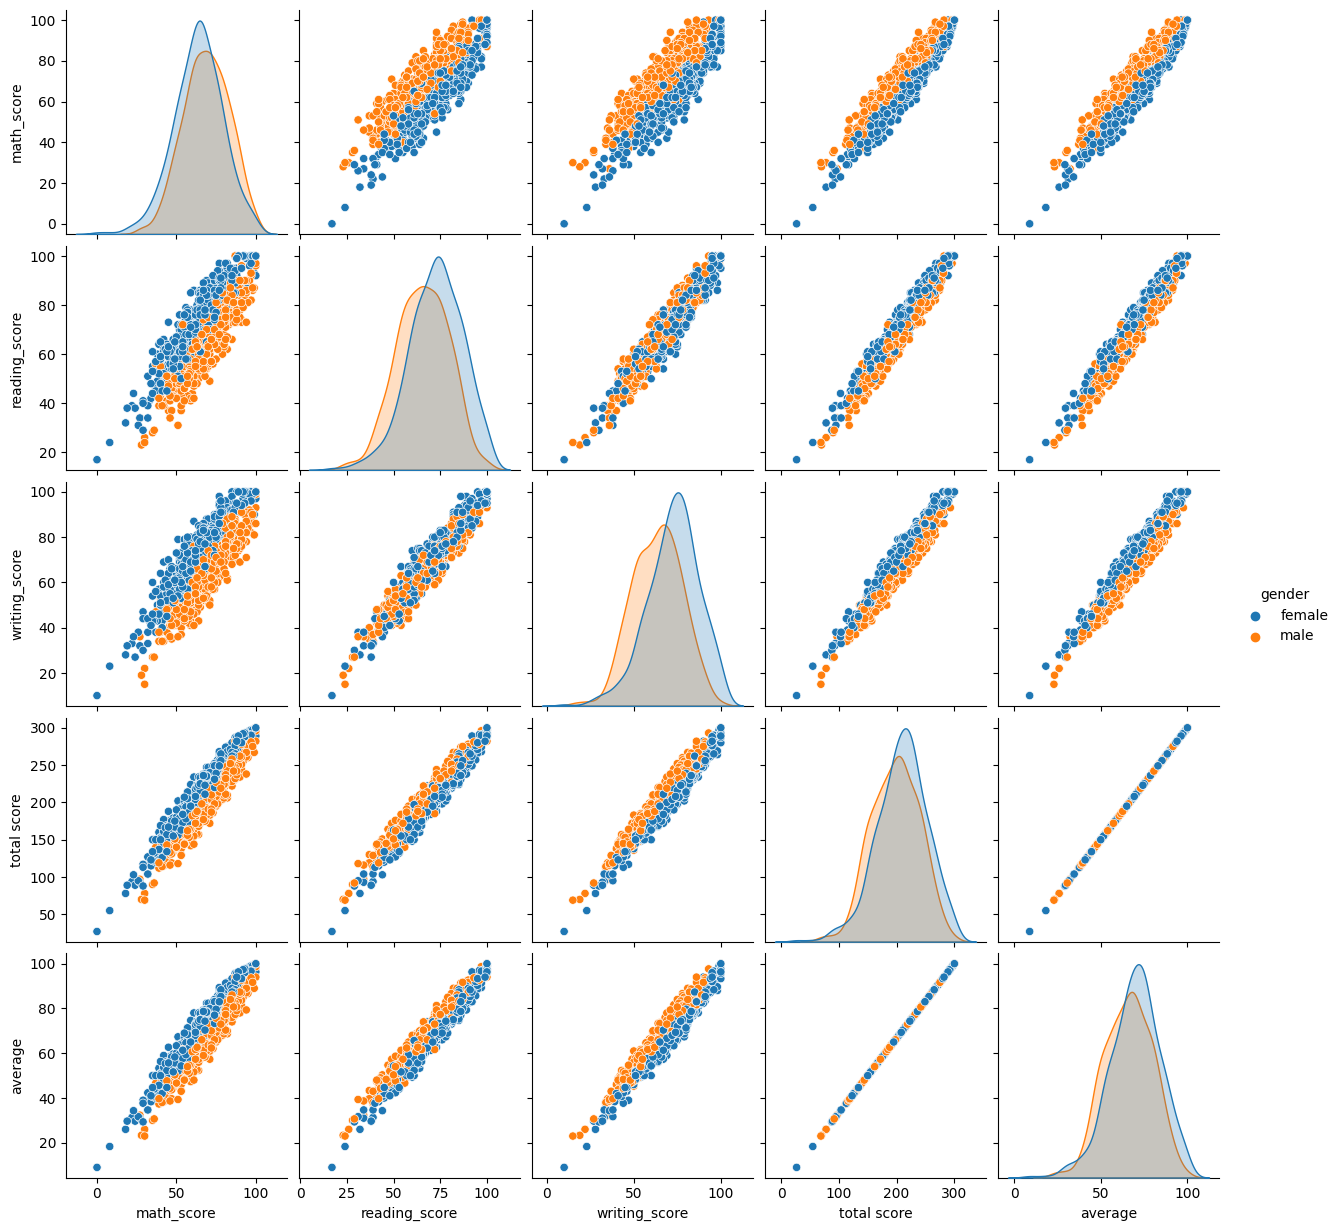

In [94]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### further analysis can be performed with statistical tests to infer some of the insights found .



### Conclusion
#### student performance is related to lunch parental education race/ethinicity
#### higher females in top scorer as well as in passing percentage.
#### test preparation course is benefitial .(Further statistical tests can be done to check if course really helped.)

#### Further analysis
##### performing t test by taking out samples of females randomly and checking if course material really improved performance .There can be limitation in terms of data obtained as lunch and race/ethinicty can cause effects.If hypothesis test is performed for both genders males and females while taking sample and the H0:no change in scores ,Ha=increase in score (after preparation) if p value will be less than significance then we can reject null hypothesis.i.e. increase in score after preparation.
